In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "../House Price Prediction/"]).decode("utf8"))

Compare Ridge Vs Lasso.ipynb
House Price Prediction Best Score.ipynb
House Price Prediction Model.ipynb
HousePricePrediction.ipynb
PCA.ipynb
Pipeline examples.ipynb
Stacked model.ipynb
data_description.webarchive
ensemble_4_corr_models.csv
keras_sol.csv
lasso_xgb_sol.csv
output.csv
output1.csv
output10.csv
output11.csv
output2.csv
output3.csv
output4.csv
output5.csv
output6.csv
output7.csv
output8.csv
output9.csv
ridge_lasso_avg.csv
ridge_sol.csv
ridge_sol1.csv
submission1.csv
test.csv
train.csv
xgstacker_starter.csv



In [2]:
train = pd.read_csv('../House Price Prediction/train.csv')
print(train.shape)
test = pd.read_csv('../House Price Prediction/test.csv')
print(test.shape)

(1460, 82)
(1459, 81)


In [3]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
y = train['SalePrice']
combined = pd.concat([train,test], ignore_index=True)
combined.drop('SalePrice', axis=1, inplace=True)
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Unnamed: 0,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,1,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,2,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,3,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,4,AllPub,192,2000,2000,2008


In [5]:
#Drop variables having near zero variance
threshold = 0.2

combined.drop(combined.std()[combined.std() < threshold].index.values, axis=1,inplace=True)
combined.drop('Id', axis=1, inplace=True)

In [6]:
combined.std()

1stFlrSF          392.362079
2ndFlrSF          428.701456
3SsnPorch          25.188169
BedroomAbvGr        0.822693
BsmtFinSF1        455.610826
BsmtFinSF2        169.205611
BsmtFullBath        0.524736
BsmtHalfBath        0.245687
BsmtUnfSF         439.543659
EnclosedPorch      64.244246
Fireplaces          0.646129
FullBath            0.552969
GarageArea        215.394815
GarageCars          0.761624
GarageYrBlt        25.574285
GrLivArea         506.051045
HalfBath            0.502872
KitchenAbvGr        0.214462
LotArea          7886.996359
LotFrontage        23.344905
LowQualFinSF       46.396825
MSSubClass         42.517628
MasVnrArea        179.334253
MiscVal           567.402211
MoSold              2.714762
OpenPorchSF        67.575493
OverallCond         1.113131
OverallQual         1.409947
PoolArea           35.663946
ScreenPorch        56.184365
TotRmsAbvGrd        1.569379
TotalBsmtSF       440.766258
Unnamed: 0        421.393596
WoodDeckSF        126.526589
YearBuilt     

In [7]:
print(combined.shape)
# Missing values - % missing values
(combined.isnull().sum() / combined.shape[0])

(2919, 80)


1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.932169
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtFinType1     0.027064
BsmtFinType2     0.027407
BsmtFullBath     0.000685
BsmtHalfBath     0.000685
BsmtQual         0.027749
BsmtUnfSF        0.000343
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000343
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
Fence            0.804385
FireplaceQu      0.486468
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
                   ...   
LotShape         0.000000
LowQualFinSF     0.000000
MSSubClass       0.000000
MSZoning         0.001370
MasVnrArea       0.007879
MasVnrType       0.008222
MiscFeature      0.964029
MiscVal     

In [8]:
all_columns = combined.columns.values
Numeric = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_columns if value not in Numeric]

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
# One Hot Encoding and nan transformation
combined = pd.get_dummies(combined)

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
combined = imp.fit_transform(combined)

# Log transformation
combined_norm = Normalizer().fit_transform(combined)

y = np.log(y)

combined_norm
# Change -inf to 0 again
# combined[combined==-np.inf]=0

array([[  8.85439372e-02,   8.83370588e-02,   0.00000000e+00, ...,
          1.03439179e-04,   1.03439179e-04,   0.00000000e+00],
       [  1.18184548e-01,   0.00000000e+00,   0.00000000e+00, ...,
          9.36486114e-05,   9.36486114e-05,   0.00000000e+00],
       [  7.53506720e-02,   7.09279152e-02,   0.00000000e+00, ...,
          8.19029044e-05,   8.19029044e-05,   0.00000000e+00],
       ..., 
       [  5.94156128e-02,   0.00000000e+00,   0.00000000e+00, ...,
          4.85421673e-05,   4.85421673e-05,   0.00000000e+00],
       [  8.48192714e-02,   0.00000000e+00,   0.00000000e+00, ...,
          8.74425478e-05,   8.74425478e-05,   0.00000000e+00],
       [  9.13602019e-02,   9.20940187e-02,   0.00000000e+00, ...,
          9.17271103e-05,   9.17271103e-05,   0.00000000e+00]])

In [11]:
pca = PCA(whiten=True)
pca.fit(combined)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.97238803,  0.9799875 ,  0.98537695,  0.99023667,  0.99447383,
        0.99724622,  0.99811014,  0.99864016,  0.99912941,  0.99948506,
        0.99970481,  0.99977319,  0.99983151,  0.99987926,  0.99992206,
        0.99994653,  0.99996538,  0.99997897,  0.99998878,  0.9999934 ,
        0.99999663,  0.99999964,  0.99999975,  0.99999977,  0.99999979,
        0.99999981,  0.99999982,  0.99999983,  0.99999983,  0.99999984,
        0.99999985,  0.99999985,  0.99999986,  0.99999986,  0.99999987,
        0.99999987,  0.99999987,  0.99999988,  0.99999988,  0.99999988,
        0.99999989,  0.99999989,  0.99999989,  0.9999999 ,  0.9999999 ,
        0.9999999 ,  0.99999991,  0.99999991,  0.99999991,  0.99999991,
        0.99999992,  0.99999992,  0.99999992,  0.99999992,  0.99999993,
        0.99999993,  0.99999993,  0.99999993,  0.99999993,  0.99999993,
        0.99999994,  0.99999994,  0.99999994,  0.99999994,  0.99999994,
        0.99999994,  0.99999995,  0.99999995,  0.99999995,  0.99

In [12]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(combined)
dataPCA = pca.transform(combined)

In [13]:
dataPCA = pd.DataFrame(dataPCA)

In [14]:
dataPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.217694,-0.003258,-0.349048,0.410413,-1.449353,-1.731952,-0.682281,-0.010155,0.445538,0.228908,...,-0.917410,-1.073271,-1.395284,1.829562,-0.505158,0.475173,-0.414107,-0.236203,0.268247,0.100030
1,-0.071276,0.172061,1.118775,-0.583824,-0.467512,-1.691437,-0.360304,0.180096,-0.352365,-0.773592,...,0.534898,-0.955976,-0.547067,0.200547,0.194786,0.219548,0.748615,-0.685336,1.544764,-2.226614
2,0.137207,0.018694,-0.718594,0.423251,-0.852302,-1.741697,-0.643079,-0.064524,0.609249,-0.078755,...,0.738121,0.584829,-2.249791,0.474973,0.240856,0.044038,-0.733077,-0.043740,-1.562507,-0.183801
3,-0.078951,-0.184045,-0.864724,0.463130,-0.399593,-1.740424,0.120990,0.246996,0.641579,-1.094275,...,-0.877465,2.449692,-0.289843,-0.732525,-0.261887,0.059254,0.599370,1.044035,-0.100397,-0.107132
4,0.520962,0.738693,-1.004895,0.415038,-1.149906,-1.716666,-0.596336,-0.181284,1.538062,0.283627,...,-0.816262,0.317681,-2.520289,-0.015644,-0.536854,-0.115866,-0.283523,0.091349,-0.428712,-0.551710


In [15]:
# Split traing and test
train = combined[:1460]
test = combined[1460:]

In [16]:
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# R2 Score

def lets_try(train,y):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(train,y)

,R Square Score
Hubber,0.857228
SVM Linear,0.855064
Lasso,0.851304
Bayesian Ridge,0.851255
Ridge,0.851204
Linear,0.851034
SVM RBF,0.797734
Bagging,0.707826
RandomForest,0.707515
AdaBoost,0.647588


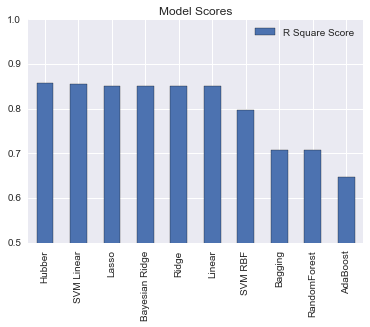

In [39]:
# Same analysis using Principle compoenents
# Split traing and test
train = dataPCA[:1460]
test = dataPCA[1460:]

lets_try(train,y)